In [46]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import operator

In [47]:
data = load_iris()
X = data.data[:,2:]
y = data.target

In [111]:
def euc(x, y):
    x = np.array(x)
    y = np.array(y)
    return sum((x-y) ** 2)

def nearest_index(x, X):
    min_euc = euc(x, X[0])
    min_idx = 0
    for idx, elem in enumerate(X):
        if min_euc > euc(x, elem):
            min_euc = euc(x, elem)
            min_idx = idx
    return min_idx

def predict(x, X, y, k, weight = lambda x: 1):
    sorted_dist = sorted(np.append(X, y, axis=1), key=lambda el: euc(x, el[:2]))
    
    res_dict = {}
    for elem in np.unique(y):
        res_dict[elem] = 0
    
    for idx, el in enumerate(sorted_dist[:k+1]):
        res_dict[el[2]] += weight(idx)
        
    return int(max(res_dict.items(), key=operator.itemgetter(1))[0])

def color(col):
    if str(int(col)) == '0':
        return 'red'
    elif str(int(col)) == '1':
        return 'green'
    return 'blue'

## Classification card

CPU times: user 3.29 s, sys: 34.2 ms, total: 3.33 s
Wall time: 3.21 s


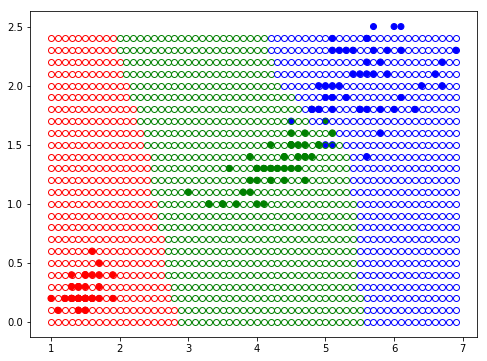

In [112]:
%%time

plt.figure(1, figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=list(map(color, y)))

step = 0.1

for i in np.arange(1, 7, step=step):
    for j in np.arange(0, 2.5, step=step):
        col = str(predict([i,j], X, y.reshape(len(X),1), 5))
        plt.plot(i, j, c=color(col), marker='o', fillstyle='none')

## LOO

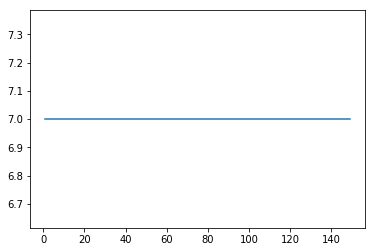

In [120]:
n = len(X)
# n = 30
k_range = range(1, n)
errors = [0] * n

q = 1

for k in k_range:
    for idx, elem in enumerate(X):
        pred = predict(elem,
                       np.delete(X, idx, 0),
                       np.delete(y.reshape(150, 1), idx, 0),
                       k, weight = lambda i: q ** i)
        if pred != y[idx]:
            errors[k] += 1

plt.plot(k_range, errors[1:])